# Color Identification using Machine Learning

In this notebook, I have used machine learning algorithm, `KMeans`, to extract colors from a give image. I will use `OpenCV2` for image manipulation, apply `KMeans` to identify the major colors and then plot the information using `Matplotlib`.


## Import libraries

Let's first import necessary libraries. We need `sklearn` for KMeans algorithm, `matplotlib.pyplot` for plotting graphs, `numpy` to work with arrays, `cv2` to work with image data, `collections` to use Counter to count values, `rgb2lab` to convert RGB values and `deltaE_cie76` to calculate similarity between colors.

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os


## Working with OpenCV
Let's first read a sample image and understand basic operations that we can do on it.
The type of this input is <class 'numpy.ndarray'>


In [4]:
image = cv2.imread(r"C:\Users\Mostafa Saftawy\Downloads\Spark_Foundation_task\sample_image.jpeg")

# Plot the image

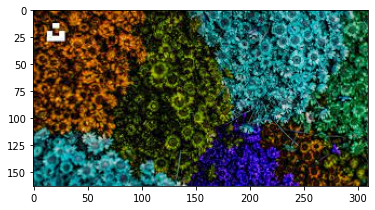

In [5]:
plt.imshow(image)


# Fixation from BGR to RGB

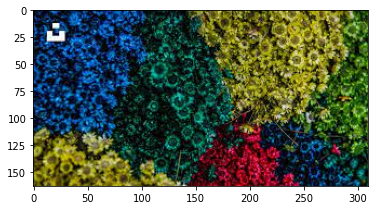

In [6]:
fixed_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(fixed_img)

# Conversion to grayscale

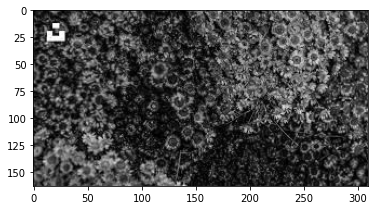

In [7]:
gray_imj = cv2.cvtColor(fixed_img, cv2.COLOR_BGR2GRAY)  
plt.imshow(gray_imj, cmap="gray")

We might want to resize the image to a certain size whenever the images are huge or when we are working with multiple images of different dimensions

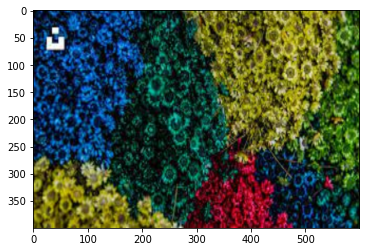

In [8]:
resized_imj = cv2.resize(fixed_img, [600,400])
plt.imshow(resized_imj)

# Color Identification


First, we will define a function that can give us the hex values of our the colors that we will identify.

In [9]:
def rgb_to_hex(color):
    #the hex values using the {:X} formatter that automatically converts decimal values to hex values.
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

# Kmeans to cluster 

KMeans algorithm creates clusters based on the supplied count of clusters. In our case, it will form clusters of colors and these clusters will be our top colors. We then fit and predict on the same image to extract the prediction into the variable labels.

KMeans expects flattened array as input during its fit method. Thus, we need to reshape the image using numpy. Then, we can apply KMeans to first fit and then predict on the image to get the results. Then, the cluster colors are identified an arranged in the correct order. We plot the colors as a pie chart.

I have combined all the steps in two method.

In [10]:
def get_colors(image, number_of_colors):
    #reshape the img as kmeans accept 2D
    image = image.reshape(image.shape[0]*image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(image)
    #count all the labels
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

   
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

Final Result.

[array([ 11.49224405,  57.00057451, 112.1363323 ]),
 array([24.14892201, 97.54438382, 82.31960341]),
 array([109.1732651 , 113.60399018,  28.58068532]),
 array([13.30935074, 18.42184192, 16.04218419]),
 array([60.83348682, 72.35140975, 15.51526636]),
 array([154.51942133, 155.3916043 ,  48.18267341]),
 array([187.94040279, 187.68269626, 124.29949308]),
 array([134.30283667,  14.99506245,  37.95440023]),
 array([10.63742869, 42.15237877, 51.63365933]),
 array([ 20.31638812, 104.12264005, 168.93337976])]

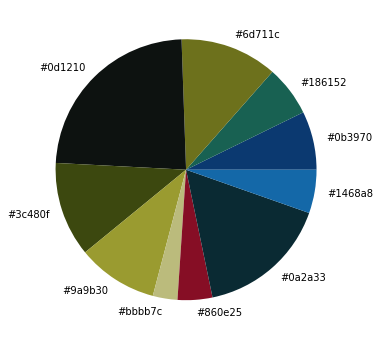

In [11]:
get_colors(resized_imj, 10)